# KNN implementaion

### 히스토그램 그래프 구현

(array([1., 0., 1., 2., 0., 0., 2., 3., 0., 1.]),
 array([-2.32546836, -1.94938303, -1.57329769, -1.19721236, -0.82112703,
        -0.4450417 , -0.06895636,  0.30712897,  0.6832143 ,  1.05929964,
         1.43538497]),
 <BarContainer object of 10 artists>)

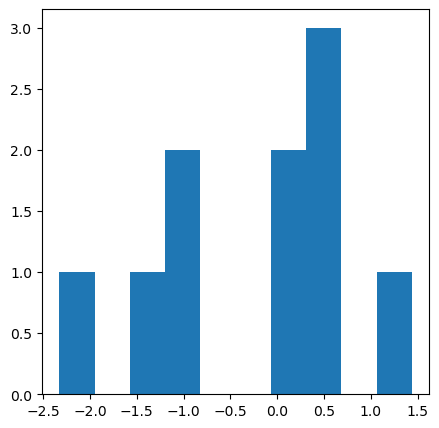

In [1]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.normal(0, 1, size=10)

fig, ax = plt.subplots(figsize=(5, 5))

ax.hist(x=data)


### data set 생성

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x_data = np.random.normal(loc=5, scale=1, size=(100, 1))
y_data = np.random.normal(loc=3, scale=1, size=(100, 1))

# zip
# data = np.array(list(zip(x_data, y_data)))

# 전치행렬
# data = np.array([x_data, y_data]).T

# concat
# data = np.concatenate([x_data, y_data], axis=1)

# normal
data = np.random.normal(loc=[5, 3], scale=[1, 1], size=(100, 2))

print(f"mean = {np.mean(data, axis=0)}")
print(f"std = {np.std(data, axis=0)}")

mean = [4.99971037 3.01467485]
std = [1.02003973 0.97765966]


### centroid

cent = [-4  4]
mean = [-3.99231889  4.11606231]
std = [1.04389966 1.81089299]


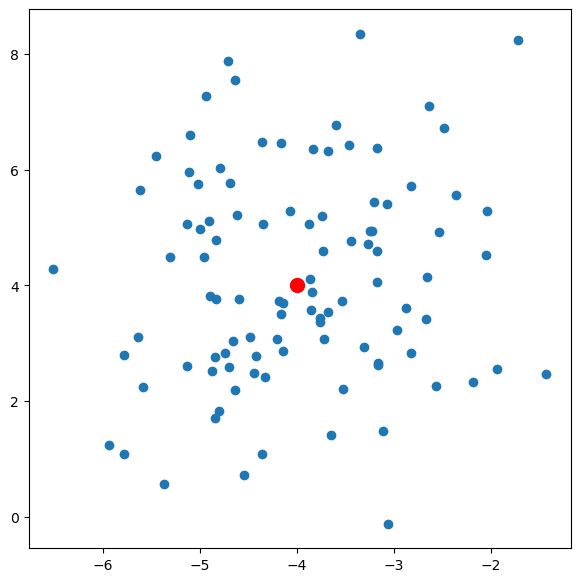

In [102]:
import matplotlib.pyplot as plt
import numpy as np

centroid = np.random.randint(-5, 5, size=2)

print(f"cent = {centroid}")

data = np.random.normal(loc=centroid, scale=[1, 2], size=(100, 2))

print(f"mean = {data.mean(axis=0)}")
print(f"std = {data.std(axis=0)}")

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(centroid[0], centroid[1], color='red', s=100)
ax.scatter(data[:,0], data[:,1])



### cluster (class dataset)

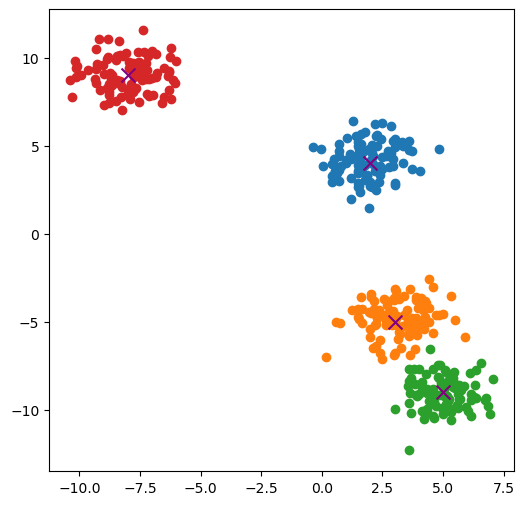

In [174]:
import matplotlib.pyplot as plt
import numpy as np

centroids = np.random.randint(-10, 10, size=(4, 2))

data_set = np.vstack(
    [
        np.random.normal(loc=cent, scale=1, size=(100, 2)) 
        for cent in centroids
    ]
)

fig, ax = plt.subplots(figsize=(6, 6))

for (idx_cent, cent) in enumerate(centroids):
    unit = 100
    start = idx_cent * unit
    end = start + unit
    data = data_set[start:end]
    ax.scatter(x=data[:, 0], y=data[:, 1])
    ax.scatter(x=cent[0], y=cent[1], color="purple", marker="x", s=100)

### targets

In [175]:
import matplotlib.pyplot as plt
import numpy as np

for idx_data in range(4):
    print(
        np.full(shape=(100,), fill_value=idx_data)
    )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


### KNN 구현

max 3


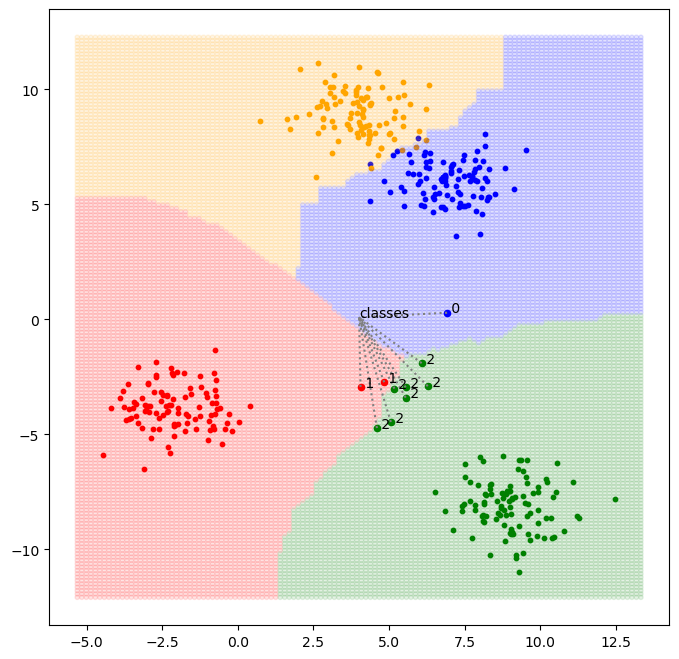

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import operator

# Data set 생성
centroids = np.random.randint(-10, 11, size=(5, 2))
test_centroids = centroids[0]
data_centroids = centroids[1:]
range_data_centroids = range(len(data_centroids))
unit = 100
y = np.hstack([
        np.full(shape=(unit,), fill_value=i)
        for i in range_data_centroids
    ])
data_set = np.vstack([
        np.random.normal(loc=data_centroids[i], scale=1, size=(unit, 2))
        for i in range_data_centroids
    ])
test_size = 10
test_set = np.random.normal(loc=test_centroids, scale=1, size=(test_size, 2))
print("max", max([1,2,3]))
# euclidean distance 구하기
def classify(data_set, test_set, K: int) -> list[int]:
    classifications = [ -1 for _ in range(len(test_set)) ]
    for (idx_test, test) in enumerate(test_set):
        diffs = abs(data_set - test)
        euclidean_distances = (diffs.sum(axis=1) ** 0.5).reshape(-1, 1)
        concatenated = np.concatenate([ euclidean_distances, y.reshape(-1, 1) ], axis=1)
        sorted_euclidean_distances = concatenated[concatenated[:, 0].argsort()]
        K_distances = sorted_euclidean_distances[:K]
        count_list = [ 0 for _ in range_data_centroids ]
        for (_, clazz) in K_distances:
            count_list[int(clazz)] += 1
        (max_index, _) = max(enumerate(count_list), key=operator.itemgetter(1))
        classifications[idx_test] = max_index
    return classifications

classifications = classify(data_set=data_set, test_set=test_set, K=5)

# knn visualization
fig, ax = plt.subplots(figsize=(8, 8))
color_list = ["blue", "red", "green", "orange"]
for (idx_centroids, centroid) in enumerate(data_centroids):
    start = idx_centroids * unit
    end = start + unit
    data = data_set[start:end]
    ax.scatter(x=data[:, 0], y=data[:, 1], s=10, color=color_list[idx_centroids])

for idx_test, test in enumerate(test_set):
    ax.scatter(x=test[0],y=test[1], s=20, color=color_list[classifications[idx_test]])
    ax.annotate(f" {classifications[idx_test]}", xy=(test[0], test[1]))

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
x_mesh = np.linspace(start=x_min, stop=x_max, num=(abs(int(x_max))+abs(int(x_min))) * 7)
y_mesh = np.linspace(start=y_min, stop=y_max, num=(abs(int(y_max))+abs(int(y_min))) * 7)
xx,yy = np.meshgrid(x_mesh, y_mesh)
background = np.concatenate([xx.flatten().reshape(-1, 1), yy.flatten().reshape(-1, 1)], axis=1)
boundary_classifications = classify(data_set=data_set, test_set=background, K=5)
ax.scatter(
    x=background[:, 0], 
    y=background[:, 1],
    c=[ color_list[i] for i in boundary_classifications ],
    alpha=0.1, s=10
)
x_center, y_center = (abs(x_max) - abs(x_min))/2, (abs(y_max) - abs(y_min))/2
ax.text(x_center, y_center, "classes")
for (x, y) in test_set:
    ax.plot((x, x_center), (y, y_center), color="gray", linestyle="dotted")

### K-means clustering

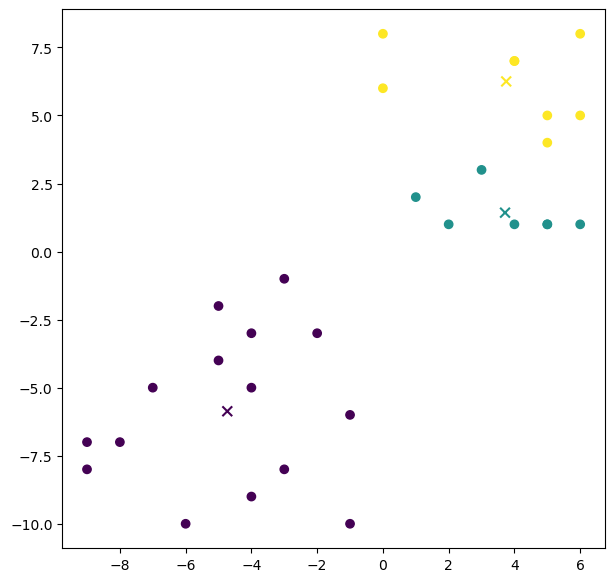

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import operator

# 1. 임의의 데이터 셋 생성
data_set = np.vstack([np.random.randint(low=-10, high=0, size=30).reshape(-1, 2),
            np.random.randint(low=0, high=11, size=30).reshape(-1, 2)])
len_data_set = len(data_set)

# 2. 기준이 되는 임의의 두 데이터 생성
n_class = 3
centroids = np.linspace(start=-10, stop=10, num=n_class * 2).reshape(-1, 2)
class_count = len(centroids)

# 3. 데이터를 순회하며 더 가까운 데이터를 찾아 클래스 분류
classes = [ [idx, centroid] for idx, centroid in enumerate(centroids) ]
classifications = np.full(shape=(len(data_set),), fill_value=-1, dtype=int)

while True:
    temp_classifications = np.full(shape=(len(data_set),), fill_value=-1, dtype=int)
    centroid_eucliean_distances = np.zeros((len_data_set, class_count)) # 각 클래스 기준 데이터들과의 유클리디언 거리 배열
    for (idx_data, data) in enumerate(data_set):
        diffs = abs(centroids - data) # 클래스 기준 데이터와의 값 - 절댓값
        centroid_eucliean_distances[idx_data] = np.sum(diffs, axis=1) ** 0.5 # 유클리디언 거리 계산
    for idx_data in range(len_data_set):
        (min_clazz, _) = min(enumerate(centroid_eucliean_distances[idx_data]), key=operator.itemgetter(1))
        temp_classifications[idx_data] = min_clazz    
    if np.all(classifications == temp_classifications): # 5. 과정을 반복하며 더이상의 분류가 일어나지 않을 때 종료
        break
    classifications = temp_classifications
    
    # 4. 클래스 별 데이터 클러스터의 중심을 구해 클래스 데이터 갱신
    classify_data_idx_set = [ [] for _ in range(class_count) ]
    for (idx, clazz) in enumerate(iterable=classifications):
        classify_data_idx_set[clazz].append(idx)
    means = [ np.mean(data_set[idx_set], axis=0) for idx_set in classify_data_idx_set ]
    centroids = np.stack(means)
    
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x=data_set[:, 0], y=data_set[:, 1], c=classifications)
ax.scatter(x=centroids[:, 0], y=centroids[:, 1], s=50, marker="x", c=range(class_count))
